In [1]:
from rdkit import Chem
from rdkit.Chem import rdDepictor
rdDepictor.SetPreferCoordGen(True)

import sys
sys.path.append('../molecules')
from rdkit.Chem import MolToSmiles, MolFromSmiles

In [11]:
def replace_last(s, old, new):
    s_reversed = s[::-1]
    old_reversed = old[::-1]
    new_reversed = new[::-1]

    # Replace the first occurrence in the reversed string
    s_reversed = s_reversed.replace(old_reversed, new_reversed, 1)

    # Reverse the string back to original order
    return s_reversed[::-1]

In [12]:
def reconstruct(fragments):
    print("Reconstructing...")
    frag_recomb_list = []
    frag_2_re = MolToSmiles(MolFromSmiles(Chem.CanonSmiles(fragments[-1])), rootedAtAtom=1)
    for i in range(len(fragments)-1):
        frag_1_re = fragments[-1*i-2]
        recomb = replace_last(frag_2_re, "*", frag_1_re.replace("*", "",1))
        recomb_canon = MolToSmiles(MolFromSmiles(Chem.CanonSmiles(recomb)),rootedAtAtom = 1)
        print("Base Molecule: ",frag_2_re)
        print("Fragment: ",frag_1_re)
        print("Recombined: ",recomb_canon)
        frag_recomb_list.append(recomb_canon)
        frag_2_re = recomb_canon
    print("Reconstructed Fragments: ",frag_recomb_list)
    print("Final Recombined Molecule", Chem.CanonSmiles(recomb))
    print("Original Molecule: ",fragment_orig)
    print("Check that the final and original molecules are the same: ", Chem.CanonSmiles(recomb) == fragment_orig) 
    molecules = [Chem.MolFromSmiles(smiles) for smiles in frag_recomb_list]
    img = Chem.Draw.MolsToGridImage(molecules, molsPerRow=4, subImgSize=(600, 600))
    return img

In [10]:
frag_str = '*N1CC2CC=CCC2C1 *C(*)=O *N* *CC* *N* *C(*)=O *c1cccnc1'
fragments = frag_str.split()
fragment_orig = 'O=C(NCCNC(=O)N1CC2CC=CCC2C1)c1cccnc1'
#fragments = ['*CCC', '*CCc1cccc(-c2ccccc2)c1', '*N(*)*', '*C(*)=O', '*NC1C(N)C=C(C(=O)O)OC1*', 'C(*)(C)=O']
# From thesis
#frag_str = '*CCC *N(*)C(=O)C1OC(C(=O)O)=CC(N)C1NC(C)=O *CC* *c1cccc(*)c1 *c1ccccc1'
#fragments = frag_str.split()

img = reconstruct(fragments)
img

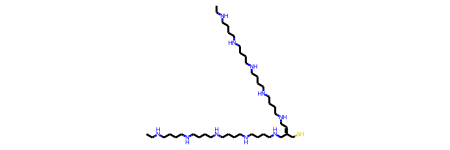

In [14]:
MolFromSmiles("CCNCCCCNCCCCNCCCCNCCCCNCC=C(CS)CNCCCCNCCCCNCCCCNCCCCNCC")